# Pulling out some demographic stats to analyse

In [1]:
from pandas import read_csv, concat
from matplotlib import pyplot as plt

import seaborn as sns
import numpy as np
import os

In [2]:
data_folder = "../../data/prepared_data/"

os.listdir(data_folder)

['unpd_combined_indicators.csv',
 'gbd_world_pop.csv',
 'date_for_8bn.csv',
 'gbd_scenarios_pop.csv',
 'unpd_world_indicators.csv',
 'gbd_world_births.csv']

In [3]:
dates_8bn = read_csv(data_folder + "date_for_8bn.csv")
gbd_scenarios_pop = read_csv(data_folder + "gbd_scenarios_pop.csv")
unpd_combined_indicators = read_csv(data_folder + "unpd_combined_indicators.csv")
unpd_combined_indicators["val"] = unpd_combined_indicators.TPopulation1July*1_000

## Median ages

In [6]:
un_matched_dates = dates_8bn\
    .merge(unpd_combined_indicators,
           "left",
           left_on=["scenario_name","year_id"],
           right_on=["Variant","Time"])\
    .loc[:,["scenario_name","year_id","MedianAgePop"]]

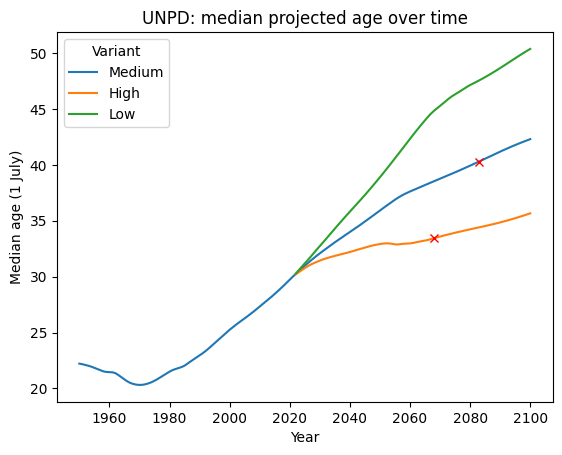

In [9]:
sns.lineplot(data=unpd_combined_indicators[unpd_combined_indicators.Location=="World"],
             x="Time",
             y="MedianAgePop",
             hue="Variant")
plt.title("UNPD: median projected age over time")
plt.xlabel("Year")
plt.ylabel("Median age (1 July)")
plt.plot(un_matched_dates.year_id, un_matched_dates.MedianAgePop, "rx")
plt.show()

Index(['Unnamed: 0', 'location_id', 'location_name', 'sex_id', 'sex',
       'age_group_id', 'age_group_name', 'year_id', 'measure_id',
       'measure_name', 'metric_id', 'metric_name', 'scenario', 'scenario_name',
       'val', 'upper', 'lower'],
      dtype='object')